
## 227 - How One Keyword Argument Can Speed Up Your Cartopy Maps!

[Youtube](https://www.youtube.com/watch?v=axSe-m3wF1I)

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
regions = {'CONUS': (-120, -75, 25, 49.5), 'AL': (-88.5, -85, 29.5, 36.), 'AZ': (-115, -108.5, 31., 37.), 'AR': (-95, -90, 33, 37)}

In [3]:
map_crs = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35, standard_parallels = (30, 60))

In [4]:

lats, lons = np.meshgrid(np.arange(25, 50, 0.05), np.arange(-124, -70, 0.05))
data = lats * lons

In [5]:
np.shape(lats)

(1080, 500)

In [6]:
lats

array([[25.  , 25.05, 25.1 , ..., 49.85, 49.9 , 49.95],
       [25.  , 25.05, 25.1 , ..., 49.85, 49.9 , 49.95],
       [25.  , 25.05, 25.1 , ..., 49.85, 49.9 , 49.95],
       ...,
       [25.  , 25.05, 25.1 , ..., 49.85, 49.9 , 49.95],
       [25.  , 25.05, 25.1 , ..., 49.85, 49.9 , 49.95],
       [25.  , 25.05, 25.1 , ..., 49.85, 49.9 , 49.95]])

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:402

10.2 s ± 341 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


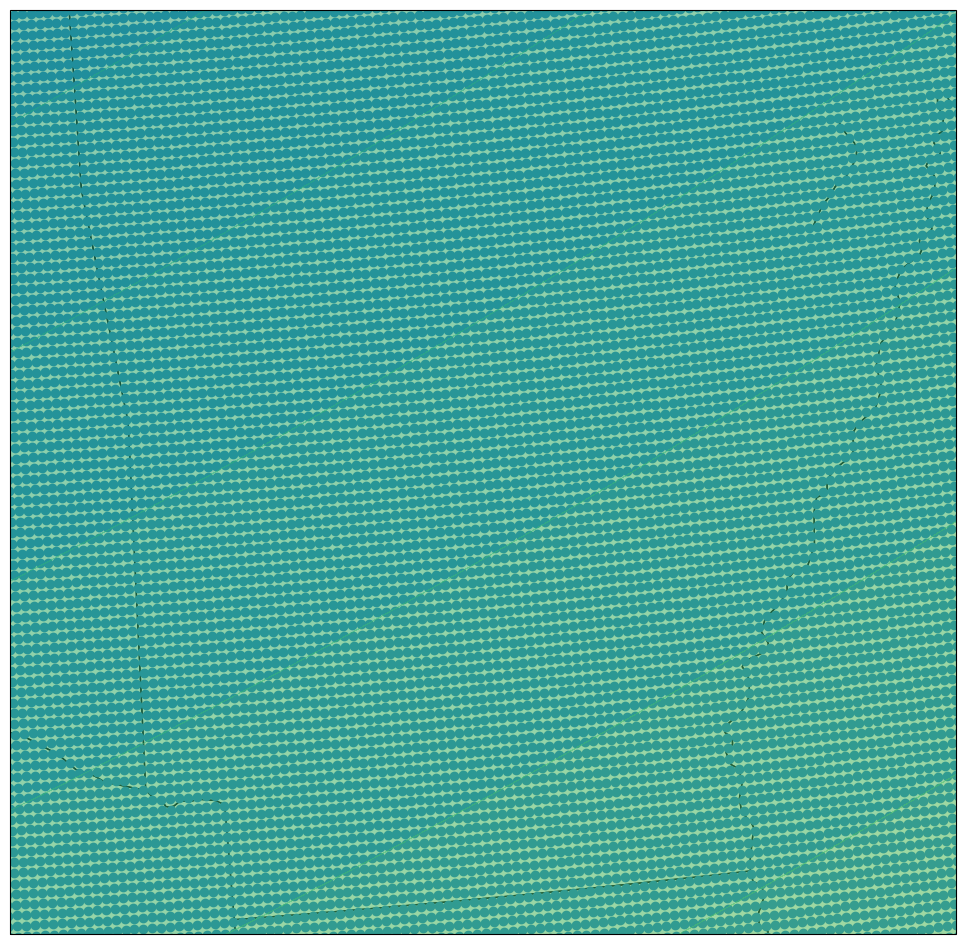

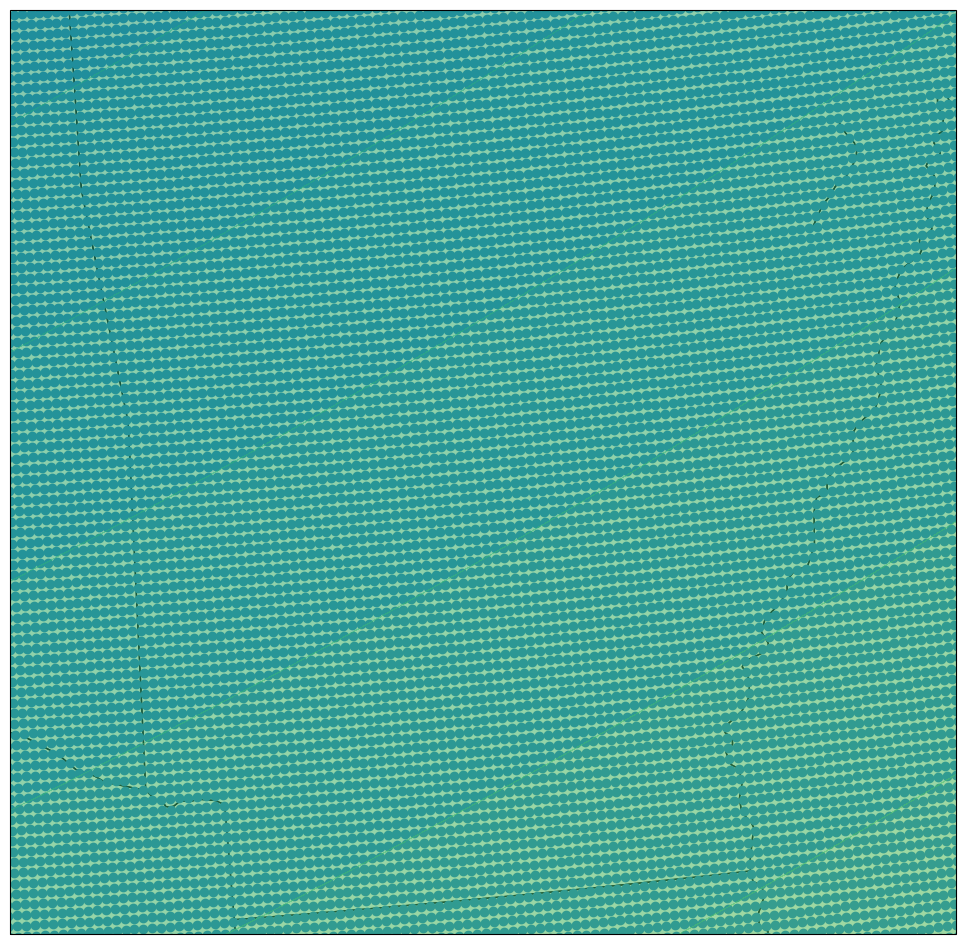

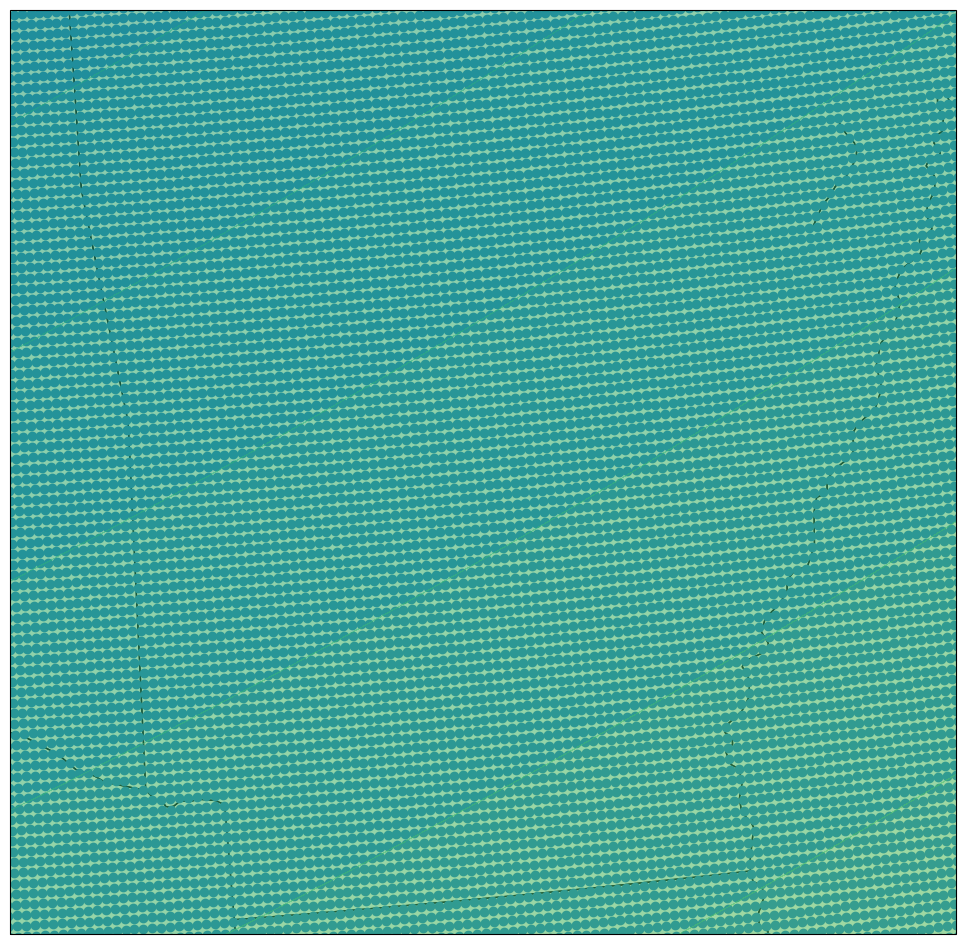

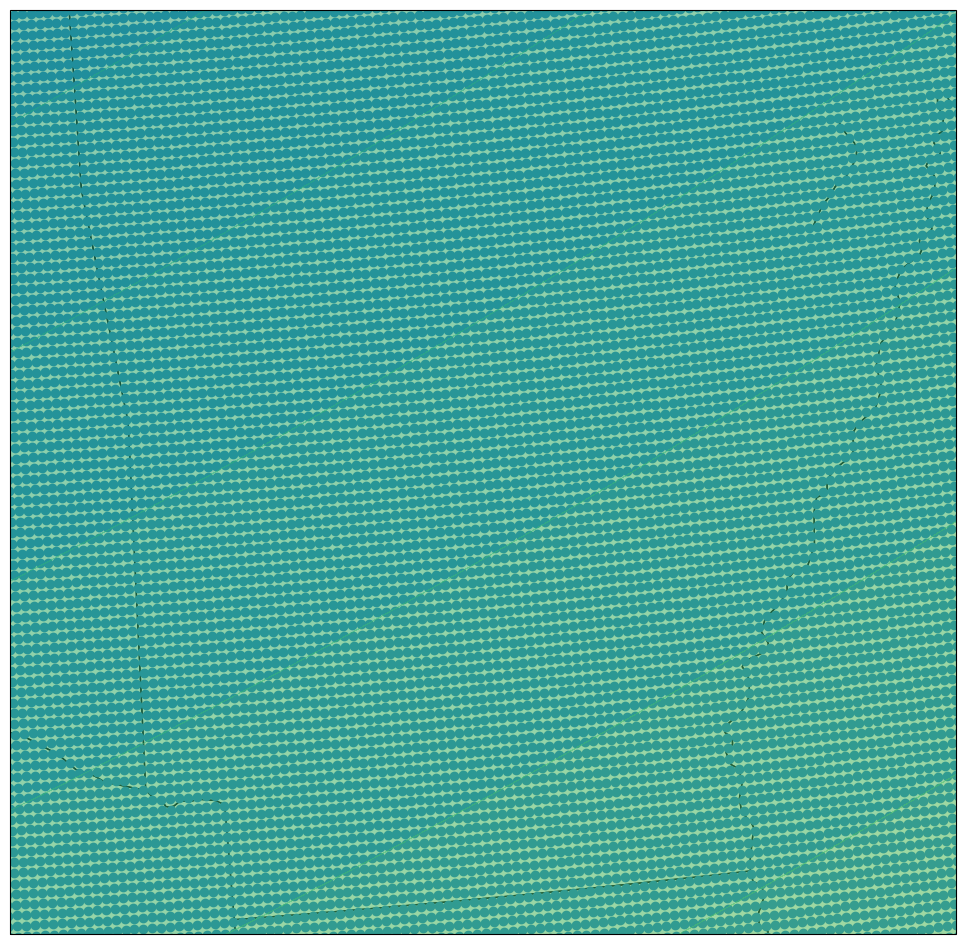

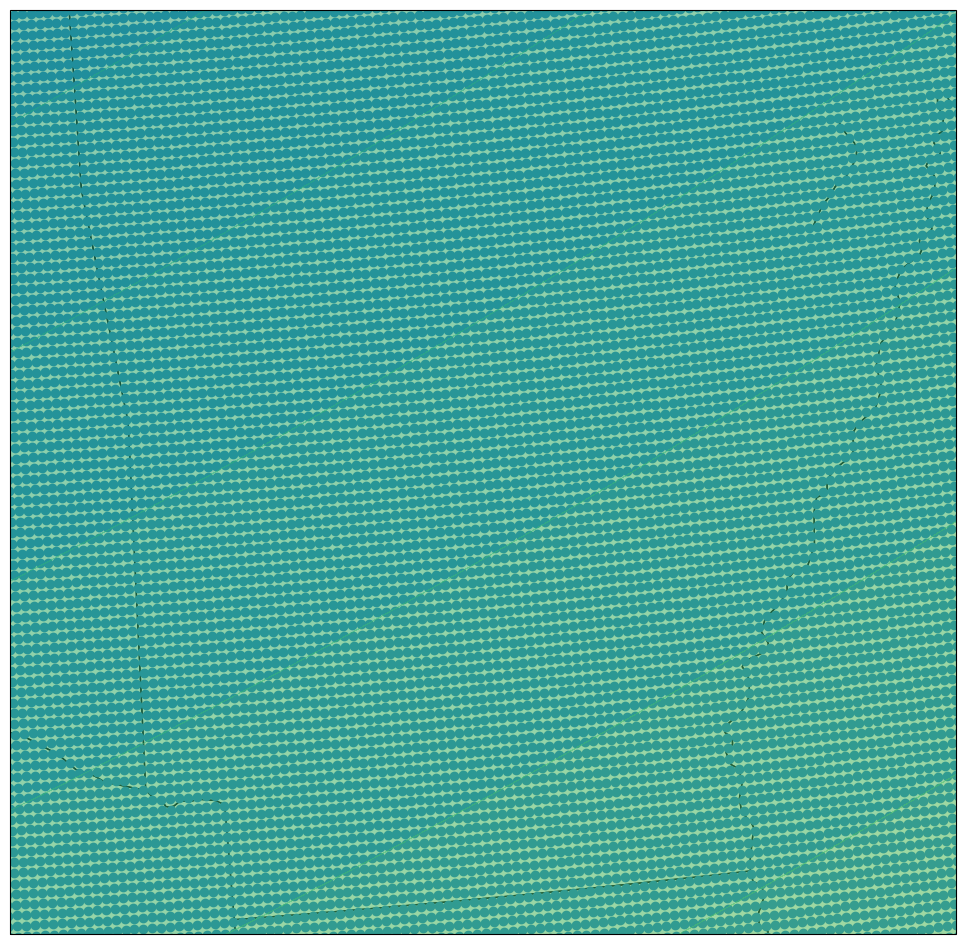

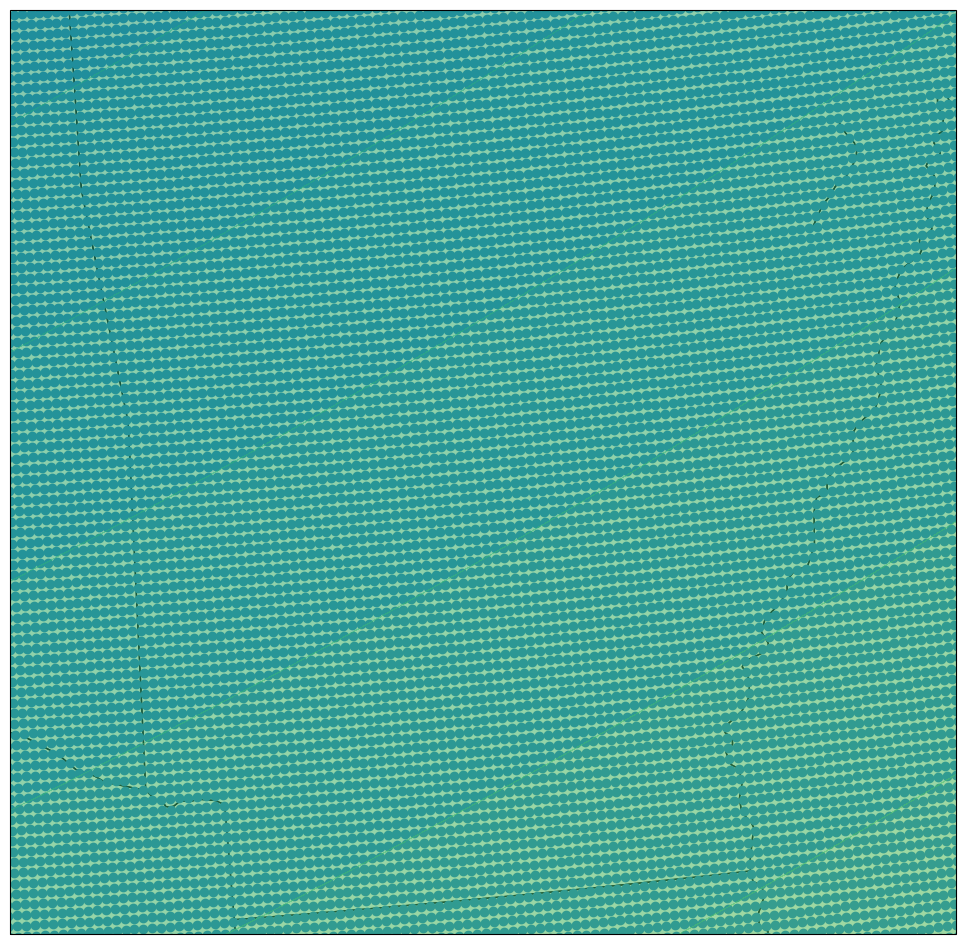

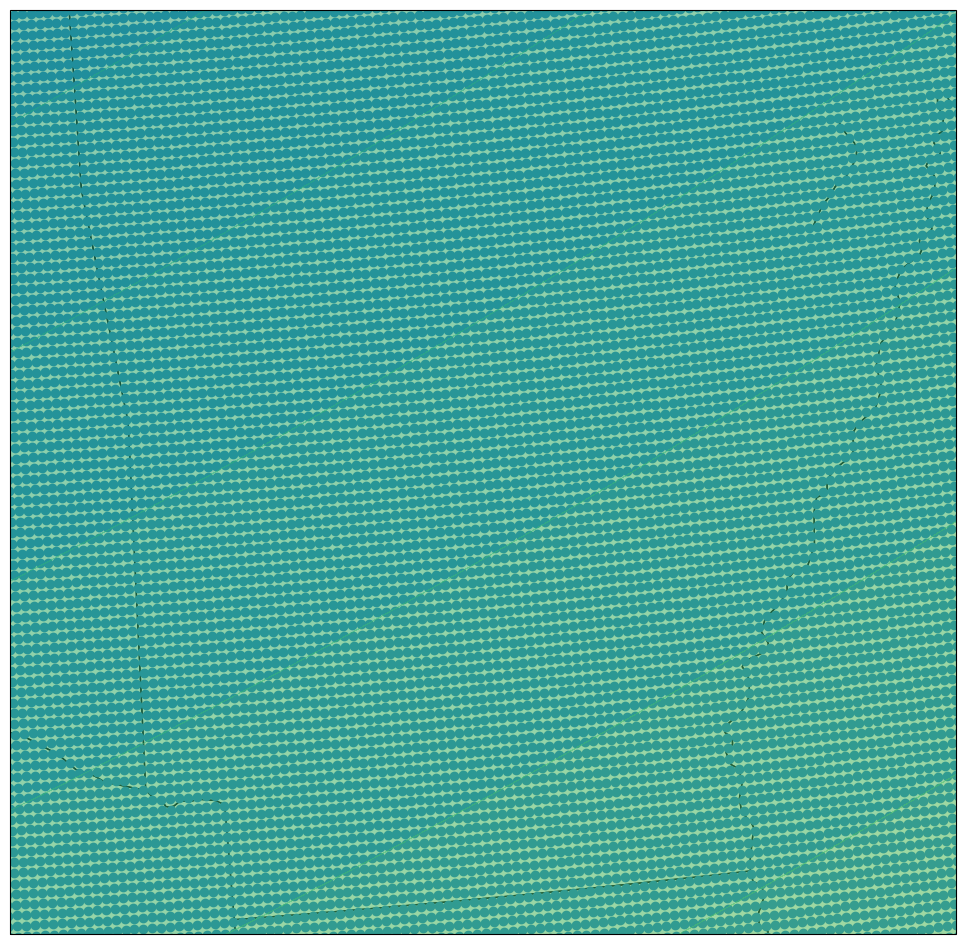

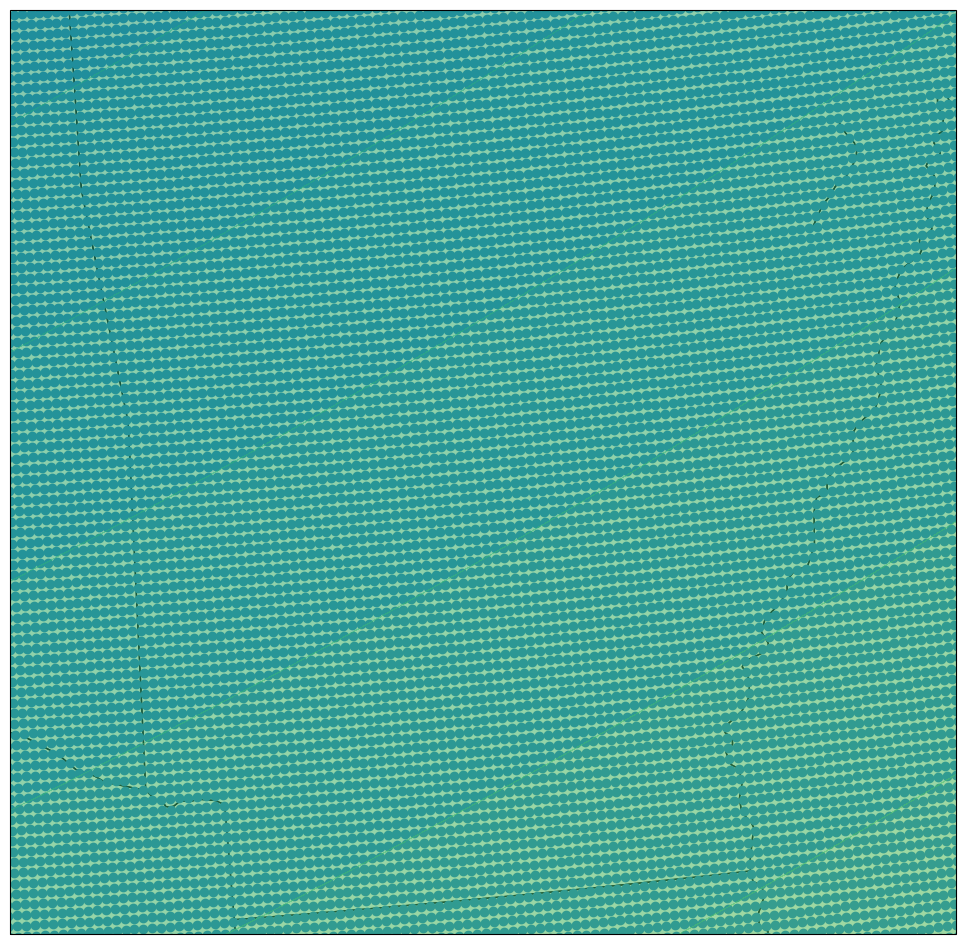

In [7]:
%%timeit
fig = plt.figure(figsize = (14, 12))
ax = plt.subplot(111, projection = map_crs)
ax.set_extent(regions['CONUS'], ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

ax.scatter(lons, lats, transform = ccrs.PlateCarree())
ax.contourf(lons, lats, data, transform = ccrs.PlateCarree(), alpha = 0.5, levels = 50)

for name, coords in regions.items():
	ax.set_extent(coords, ccrs.PlateCarree())
	plt.savefig(f'{name}.png')

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'transform_first'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will 

10.6 s ± 312 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


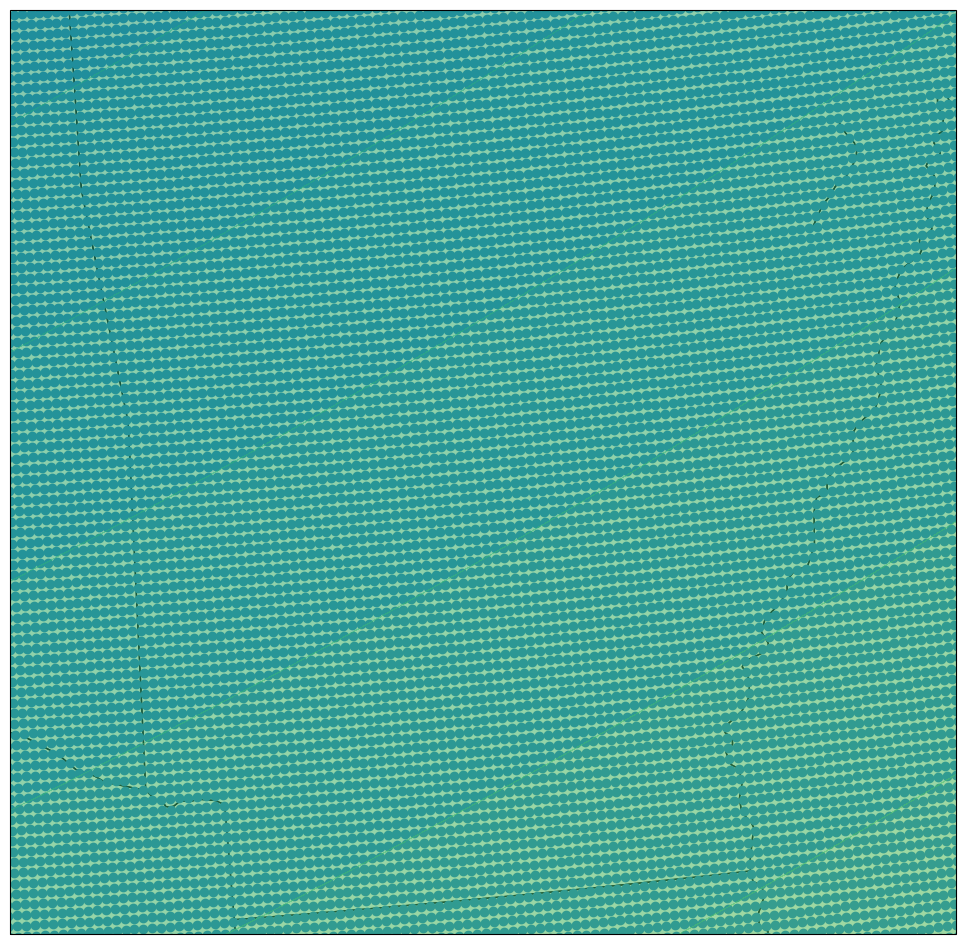

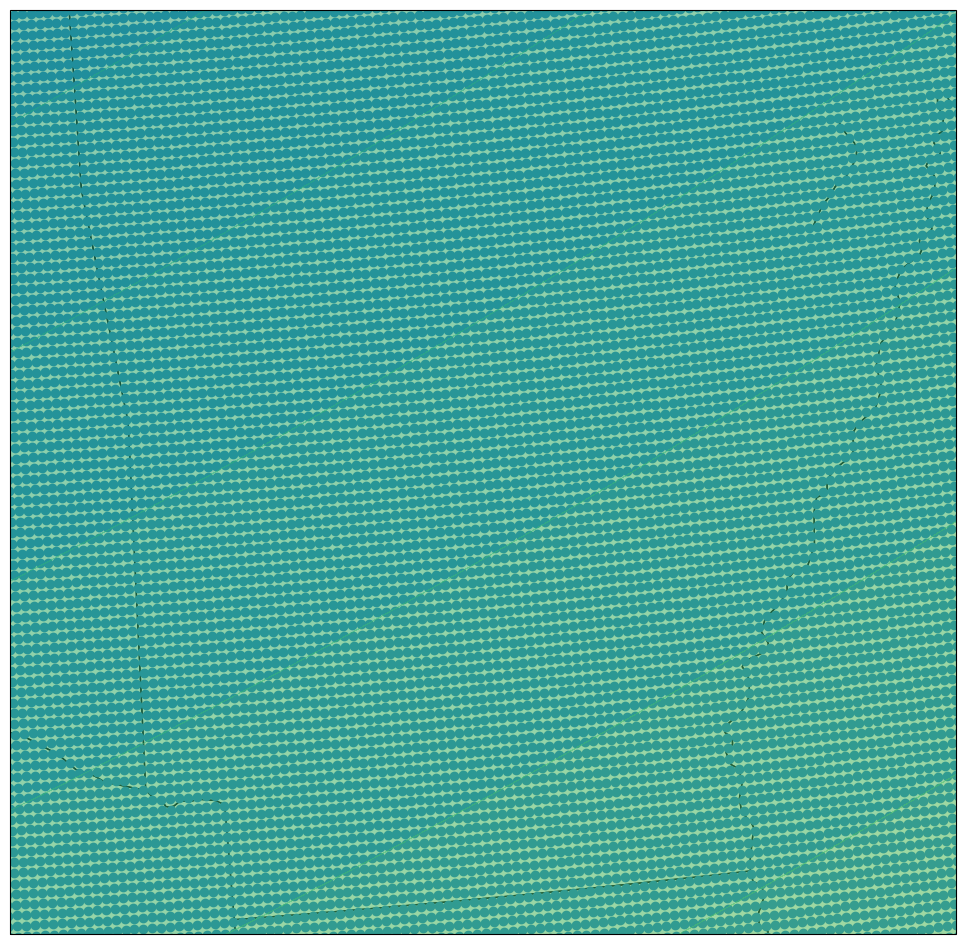

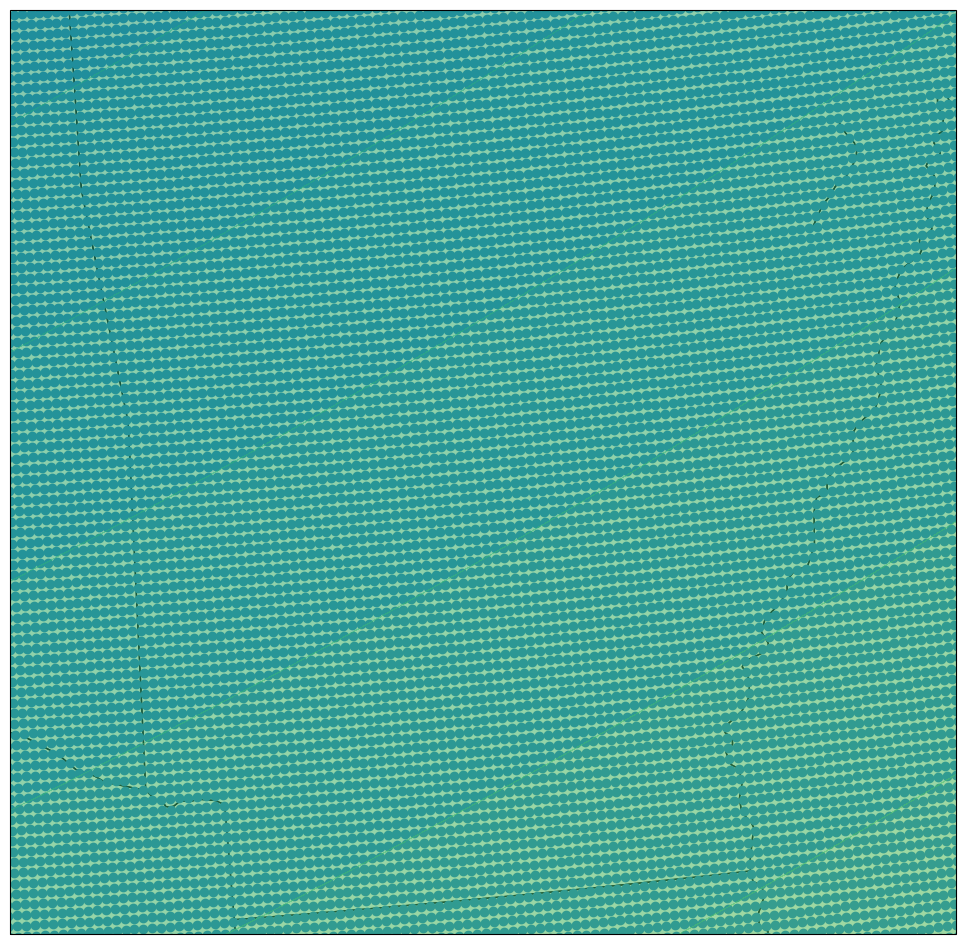

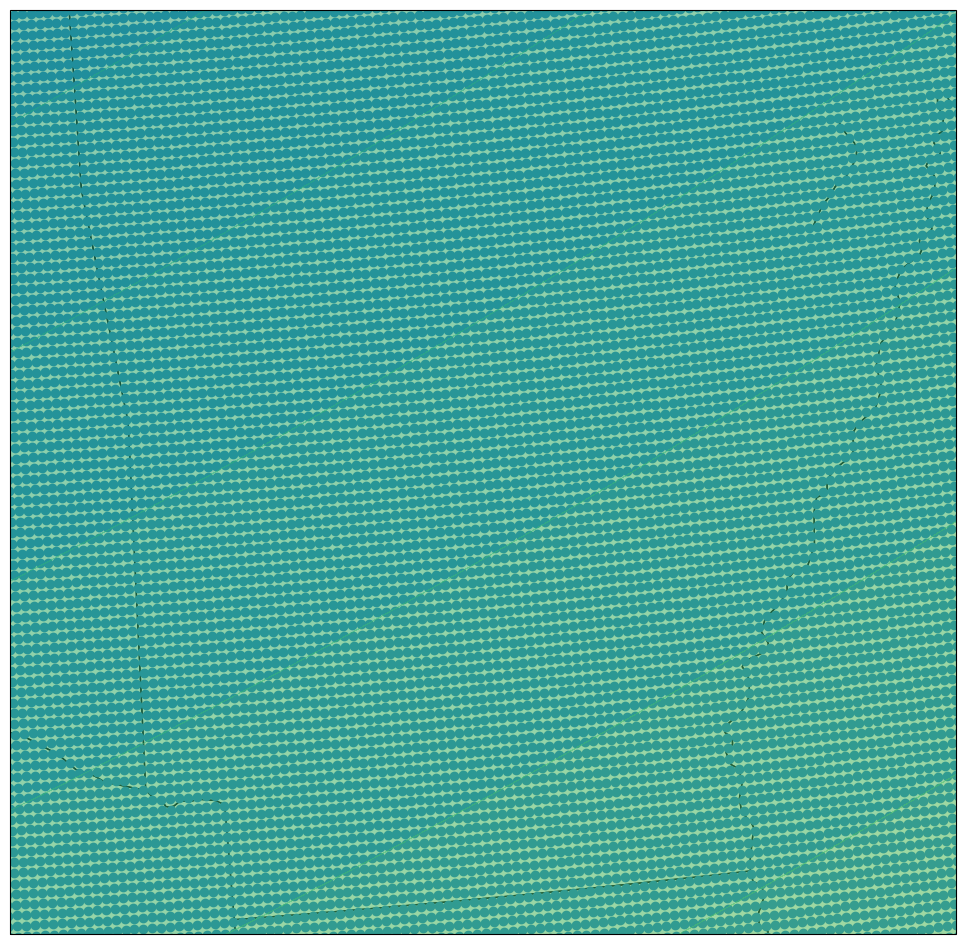

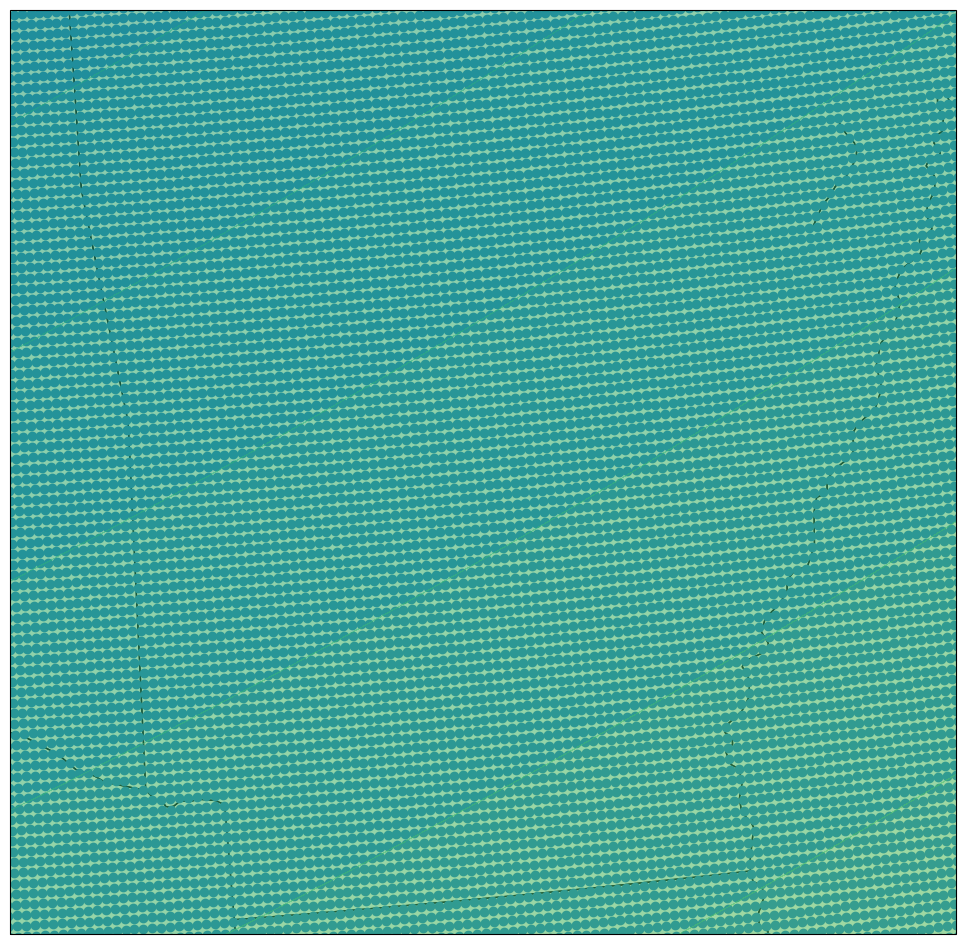

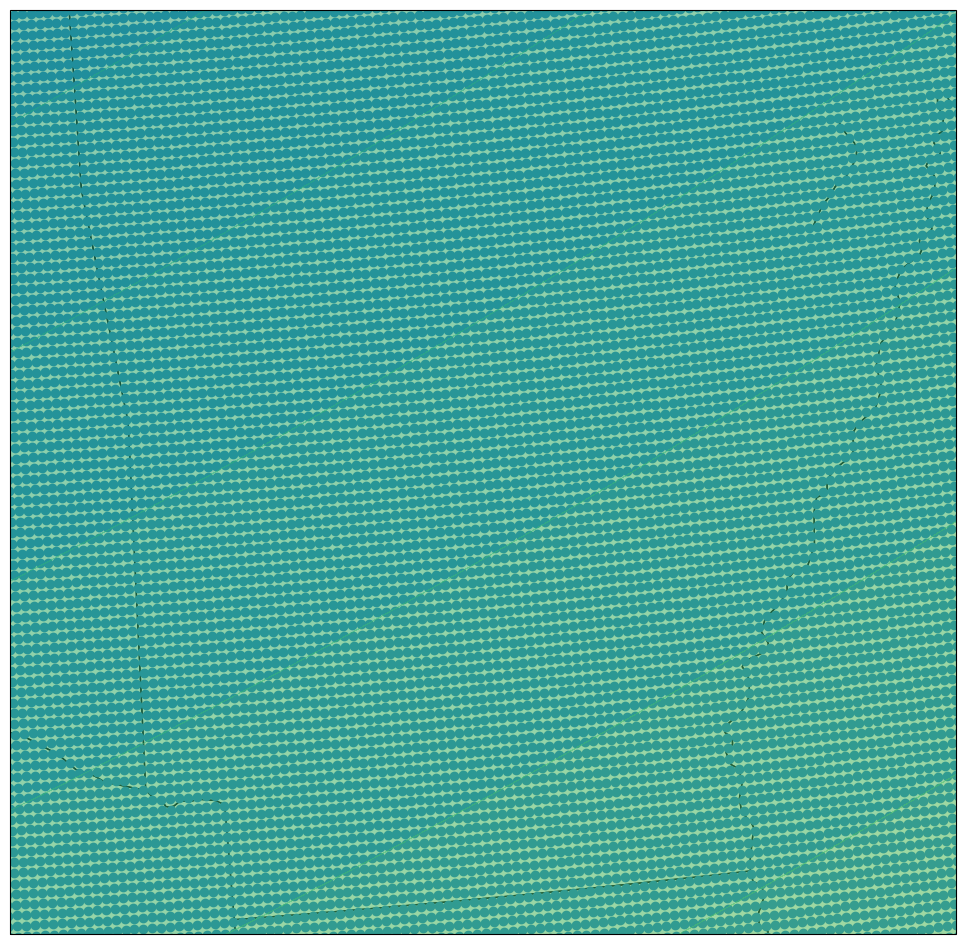

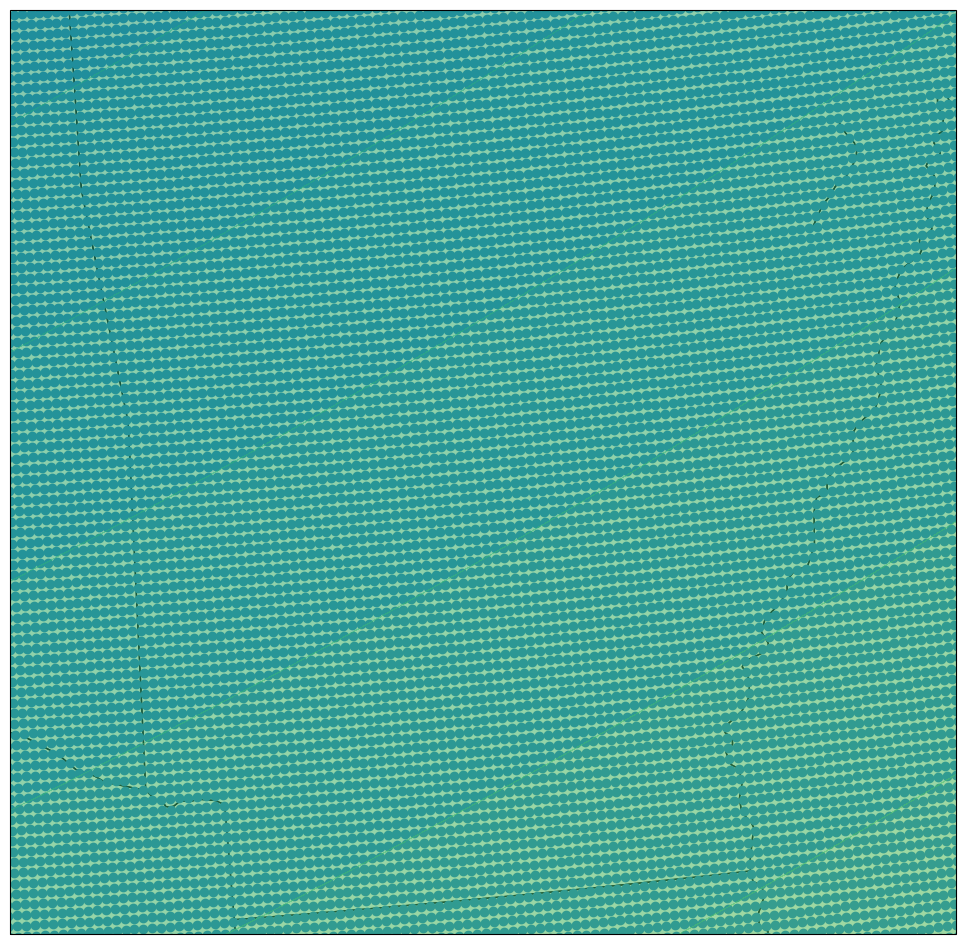

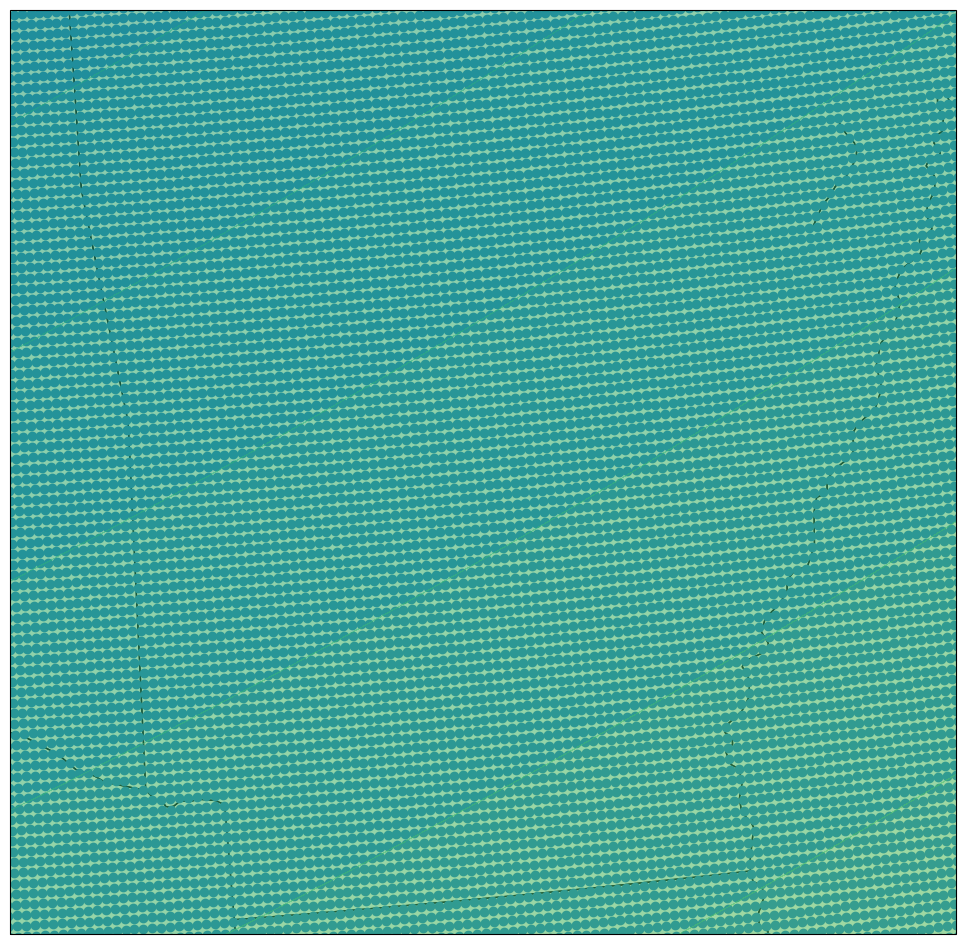

In [10]:
%%timeit
fig = plt.figure(figsize = (14, 12))
ax = plt.subplot(111, projection = map_crs)
ax.set_extent(regions['CONUS'], ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

ax.scatter(lons, lats, transform = ccrs.PlateCarree())
ax.contourf(lons, lats, data, transform = ccrs.PlateCarree(), alpha = 0.5, levels = 50, transform_first = True)

for name, coords in regions.items():
	ax.set_extent(coords, ccrs.PlateCarree())
	plt.savefig(f'{name}.png')
